In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os



batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3 convolutional Layer with kernel size (3x3)

In [2]:
model = Sequential()
model.add(Conv2D(108, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(80, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 279us/step - loss: 0.9007 - acc: 0.7070 - val_loss: 0.1023 - val_acc: 0.9714
Epoch 2/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.2373 - acc: 0.9377 - val_loss: 0.0658 - val_acc: 0.9817
Epoch 3/12
60000/60000 [==============================] - 13s 220us/step - loss: 0.1730 - acc: 0.9568 - val_loss: 0.0610 - val_acc: 0.9840
Epoch 4/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.1506 - acc: 0.9629 - val_loss: 0.0493 - val_acc: 0.9856
Epoch 5/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.1224 - acc: 0.9699 - val_loss: 0.0459 - val_acc: 0.9881
Epoch 6/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.1124 - acc: 0.9729 - val_loss: 0.0456 - val_acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 13s 223us/step - loss: 0.1017 - acc: 0.9754 - val_loss: 0.

<IPython.core.display.Javascript object>


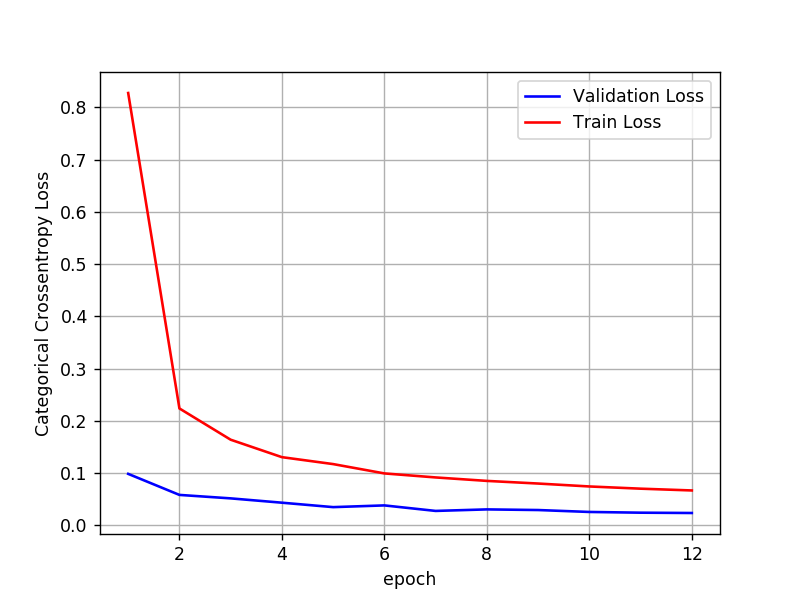

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 convolutional Layer with (5x5) kernel

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(132, (5, 5), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(92, (5, 5), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(52, (5, 5), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (5, 5), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 324us/step - loss: 1.1749 - acc: 0.5713 - val_loss: 0.0994 - val_acc: 0.9749
Epoch 2/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.2134 - acc: 0.9472 - val_loss: 0.0581 - val_acc: 0.9854
Epoch 3/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.1438 - acc: 0.9677 - val_loss: 0.0457 - val_acc: 0.9894
Epoch 4/12
60000/60000 [==============================] - 18s 299us/step - loss: 0.1158 - acc: 0.9751 - val_loss: 0.0360 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 18s 305us/step - loss: 0.0959 - acc: 0.9791 - val_loss: 0.0313 - val_acc: 0.9937
Epoch 6/12
60000/60000 [==============================] - 18s 308us/step - loss: 0.0895 - acc: 0.9797 - val_loss: 0.0375 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0827 - acc: 0.9818 - val_loss: 0.

# observation
- validation accurace decreases in epoch 6 to 7
- slightly increase in train acc from epoch 8 till 12.
- while training the accuracy fluctuate so much, it decreases and increases

<IPython.core.display.Javascript object>


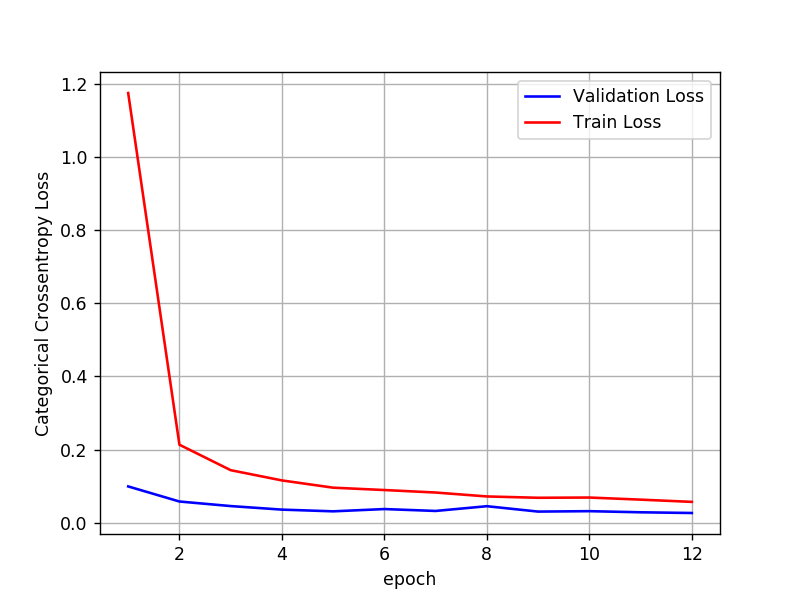

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Convolutional Layer with kernel (7x7)

In [21]:
model = Sequential()
model.add(Conv2D(132, kernel_size=(7, 7),activation='relu',input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(204, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(92, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(92, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(28, (7, 7), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 79s 1ms/step - loss: 1.6045 - acc: 0.3691 - val_loss: 0.9366 - val_acc: 0.6002
Epoch 2/12
60000/60000 [==============================] - 76s 1ms/step - loss: 1.0016 - acc: 0.5726 - val_loss: 0.8486 - val_acc: 0.6063
Epoch 3/12
60000/60000 [==============================] - 420s 7ms/step - loss: 0.8734 - acc: 0.6188 - val_loss: 0.5625 - val_acc: 0.7731
Epoch 4/12
60000/60000 [==============================] - 1019s 17ms/step - loss: 0.6425 - acc: 0.7256 - val_loss: 0.4291 - val_acc: 0.7885
Epoch 5/12
60000/60000 [==============================] - 1012s 17ms/step - loss: 0.5232 - acc: 0.7611 - val_loss: 0.4086 - val_acc: 0.7888
Epoch 6/12
60000/60000 [==============================] - 984s 16ms/step - loss: 0.4761 - acc: 0.7709 - val_loss: 0.3800 - val_acc: 0.7939
Epoch 7/12
60000/60000 [==============================] - 580s 10ms/step - loss: 0.4509 - acc: 0.7781 - val_loss: 0.375

# observation
- in some epochs train_acc and validation_acc decreases
- Took a lot time to run

<IPython.core.display.Javascript object>


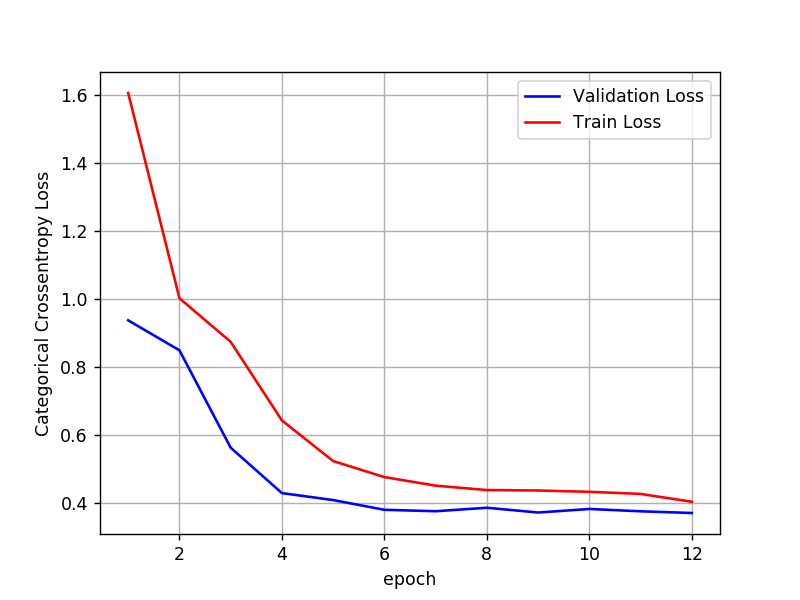

In [22]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Convolutional Layer with kernel (3x3) maxpool kernel (2x2)

In [23]:
model = Sequential()
model.add(Conv2D(132, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(204, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(92, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(92, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(28, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 201s 3ms/step - loss: 1.7567 - acc: 0.3577 - val_loss: 0.2299 - val_acc: 0.9480
Epoch 2/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.3384 - acc: 0.9103 - val_loss: 0.0825 - val_acc: 0.9782
Epoch 3/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1905 - acc: 0.9550 - val_loss: 0.0457 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1528 - acc: 0.9651 - val_loss: 0.0414 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1262 - acc: 0.9718 - val_loss: 0.0373 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.1084 - acc: 0.9757 - val_loss: 0.0302 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 190s 3ms/step - loss: 0.1002 - acc: 0.9773 - val_loss: 0.0340 - 

<IPython.core.display.Javascript object>


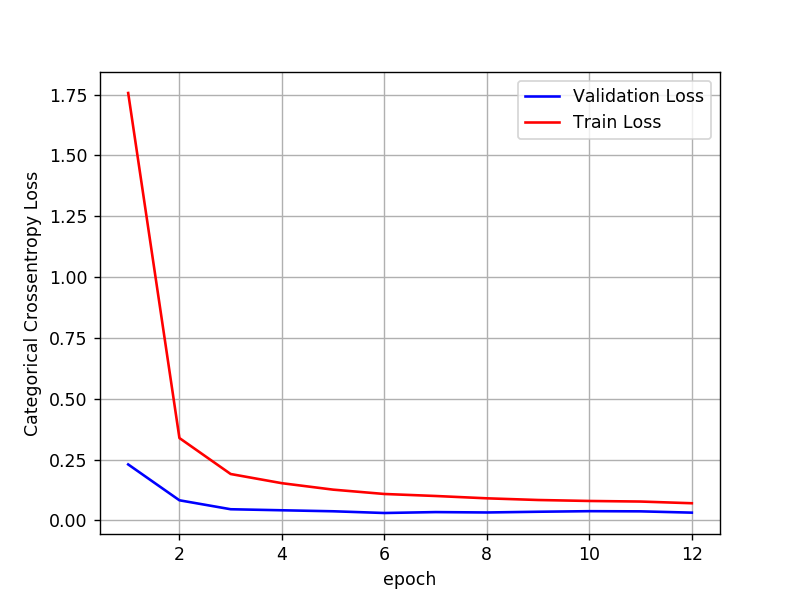

In [24]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7 Convolutional Layer with kernel (3x3) maxpool kernel (4x4)

In [25]:
model = Sequential()
model.add(Conv2D(132, kernel_size=(3, 3),activation='relu',input_shape=input_shape,padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(204, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(92, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(92, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(28, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 168s 3ms/step - loss: 2.1993 - acc: 0.1527 - val_loss: 1.6237 - val_acc: 0.3357
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 1.3502 - acc: 0.3915 - val_loss: 0.9509 - val_acc: 0.6401
Epoch 3/12
60000/60000 [==============================] - 175s 3ms/step - loss: 0.9129 - acc: 0.6279 - val_loss: 0.5289 - val_acc: 0.7796
Epoch 4/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.6521 - acc: 0.7304 - val_loss: 0.4202 - val_acc: 0.7879
Epoch 5/12
60000/60000 [==============================] - 170s 3ms/step - loss: 0.5340 - acc: 0.7712 - val_loss: 0.2919 - val_acc: 0.8861
Epoch 6/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.3829 - acc: 0.8452 - val_loss: 0.2093 - val_acc: 0.8882
Epoch 7/12
60000/60000 [==============================] - 153s 3ms/step - loss: 0.3254 - acc: 0.8627 - val_loss: 0.2132 - 

<IPython.core.display.Javascript object>


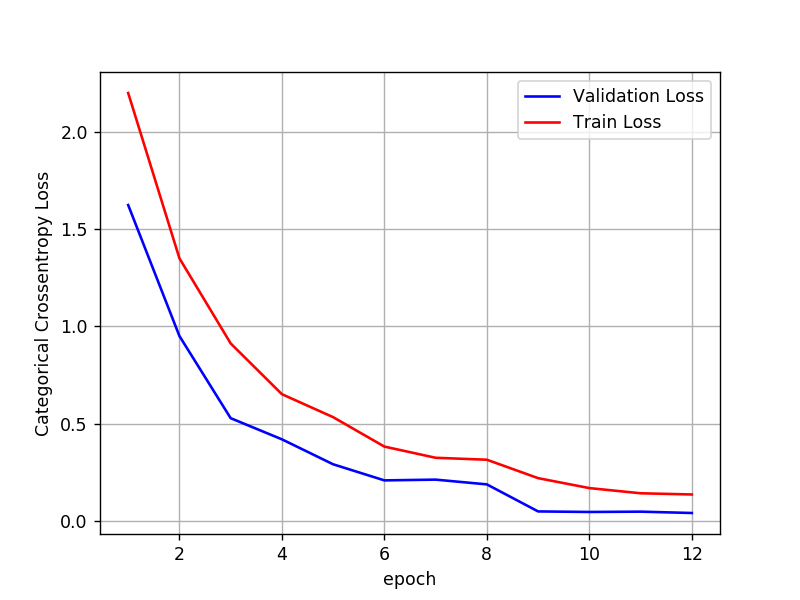

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2><font color="blue">3 Hidden layer convnets with BN, activation:- sigmoid,otimizer:-rmsprop</font></h2>

In [4]:
from keras.layers.normalization import BatchNormalization

In [5]:
model = Sequential()
model.add(Conv2D(108, kernel_size=(3, 3),
                 activation='sigmoid',
                 input_shape=input_shape,kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Conv2D(80, (3, 3), activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='sigmoid',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 57s 953us/step - loss: 1.9946 - acc: 0.3326 - val_loss: 0.4354 - val_acc: 0.8945
Epoch 2/12
60000/60000 [==============================] - 50s 825us/step - loss: 0.4082 - acc: 0.8878 - val_loss: 0.1178 - val_acc: 0.9653
Epoch 3/12
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2664 - acc: 0.9274 - val_loss: 0.0890 - val_acc: 0.9722
Epoch 4/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2170 - acc: 0.9420 - val_loss: 0.0764 - val_acc: 0.9780
Epoch 5/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1994 - acc: 0.9492 - val_loss: 0.0806 - val_acc: 0.9799
Epoch 6/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1837 - acc: 0.9522 - val_loss: 0.0838 - val_acc: 0.9742
Epoch 7/12
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1726 - acc: 0.9553 - val_loss: 0.0611 - val

<IPython.core.display.Javascript object>


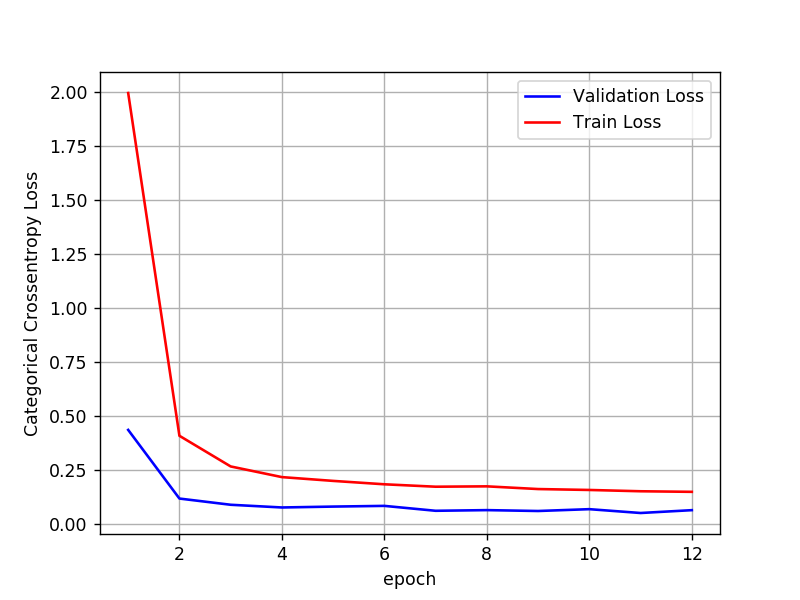

In [9]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2><font color="blue">4 Hidden layer convnets without BN, activation:- relu,otimizer:-adagrad</font></h2>

In [14]:
model = Sequential()
model.add(Conv2D(108, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(80, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 285us/step - loss: 1.1929 - acc: 0.6049 - val_loss: 0.2040 - val_acc: 0.9544
Epoch 2/12
60000/60000 [==============================] - 16s 263us/step - loss: 0.4571 - acc: 0.8650 - val_loss: 0.1062 - val_acc: 0.9714
Epoch 3/12
60000/60000 [==============================] - 16s 264us/step - loss: 0.3296 - acc: 0.9068 - val_loss: 0.0791 - val_acc: 0.9785
Epoch 4/12
60000/60000 [==============================] - 16s 264us/step - loss: 0.2669 - acc: 0.9267 - val_loss: 0.0740 - val_acc: 0.9790
Epoch 5/12
60000/60000 [==============================] - 16s 263us/step - loss: 0.2309 - acc: 0.9366 - val_loss: 0.0594 - val_acc: 0.9825
Epoch 6/12
60000/60000 [==============================] - 16s 265us/step - loss: 0.2115 - acc: 0.9434 - val_loss: 0.0546 - val_acc: 0.9840
Epoch 7/12
60000/60000 [==============================] - 16s 262us/step - loss: 0.1934 - acc: 0.9501 - val_loss: 0.

<IPython.core.display.Javascript object>


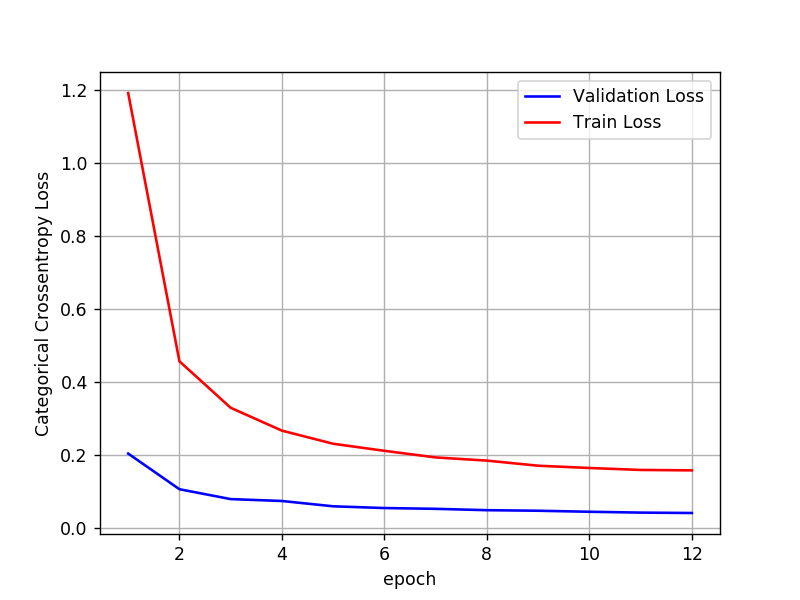

In [15]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2><font color="blue">5 Hidden layer convnets with BN, activation:- relu,otimizer:-adadelta</font></h2>

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(132, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(92, (5, 5), activation='relu',padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(52, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(42, (5, 5), activation='relu',padding='same'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 32s 530us/step - loss: 1.0094 - acc: 0.6831 - val_loss: 0.0892 - val_acc: 0.9764
Epoch 2/12
60000/60000 [==============================] - 27s 455us/step - loss: 0.2389 - acc: 0.9409 - val_loss: 0.0529 - val_acc: 0.9856
Epoch 3/12
60000/60000 [==============================] - 27s 457us/step - loss: 0.1482 - acc: 0.9651 - val_loss: 0.0326 - val_acc: 0.9912
Epoch 4/12
60000/60000 [==============================] - 28s 459us/step - loss: 0.1176 - acc: 0.9724 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 5/12
60000/60000 [==============================] - 28s 462us/step - loss: 0.0970 - acc: 0.9777 - val_loss: 0.0289 - val_acc: 0.9928
Epoch 6/12
60000/60000 [==============================] - 28s 460us/step - loss: 0.0871 - acc: 0.9802 - val_loss: 0.0248 - val_acc: 0.9935
Epoch 7/12
60000/60000 [==============================] - 27s 457us/step - loss: 0.0789 - acc: 0.9821 - val_loss: 0.

<IPython.core.display.Javascript object>


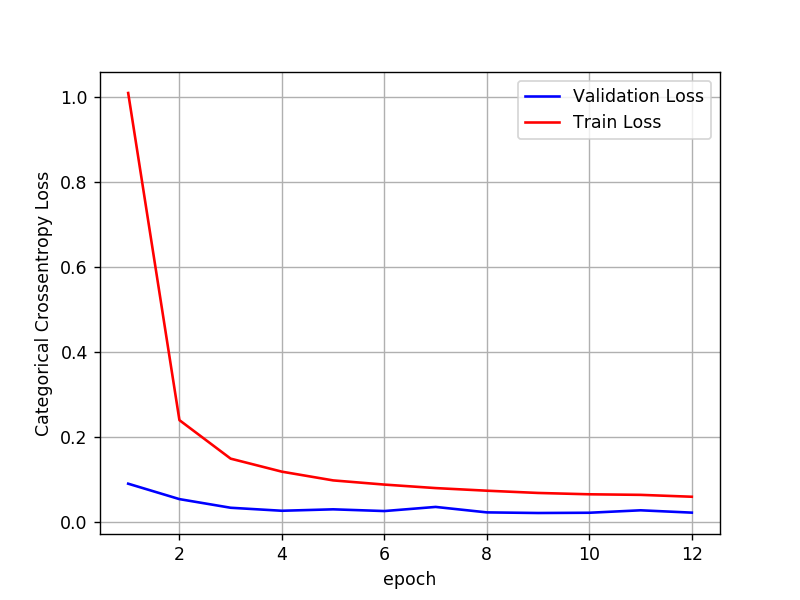

In [20]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h2><font color="blue">5 Hidden layer convnets with without BN, activation:- selu,otimizer:-Nadam</font></h2>

In [31]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='selu',input_shape=input_shape,padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(132, (5, 5), activation='selu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(92, (5, 5), activation='selu',padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(52, (5, 5), activation='selu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(42, (5, 5), activation='selu',padding='same'))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128, activation='selu'))
model.add(Dropout(0.6))

model.add(Dense(64, activation='selu'))
model.add(Dropout(0.6))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 36s 600us/step - loss: 1.2713 - acc: 0.7151 - val_loss: 0.1347 - val_acc: 0.9611
Epoch 2/12
60000/60000 [==============================] - 34s 560us/step - loss: 0.3566 - acc: 0.9042 - val_loss: 0.0830 - val_acc: 0.9769
Epoch 3/12
60000/60000 [==============================] - 34s 562us/step - loss: 0.2787 - acc: 0.9292 - val_loss: 0.2013 - val_acc: 0.9388
Epoch 4/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.2634 - acc: 0.9345 - val_loss: 0.0846 - val_acc: 0.9763
Epoch 5/12
60000/60000 [==============================] - 34s 564us/step - loss: 0.5226 - acc: 0.8819 - val_loss: 0.0819 - val_acc: 0.9802
Epoch 6/12
60000/60000 [==============================] - 34s 565us/step - loss: 0.3145 - acc: 0.9264 - val_loss: 0.0871 - val_acc: 0.9795
Epoch 7/12
60000/60000 [==============================] - 34s 565us/step - loss: 0.3579 - acc: 0.9195 - val_loss: 0.

<IPython.core.display.Javascript object>


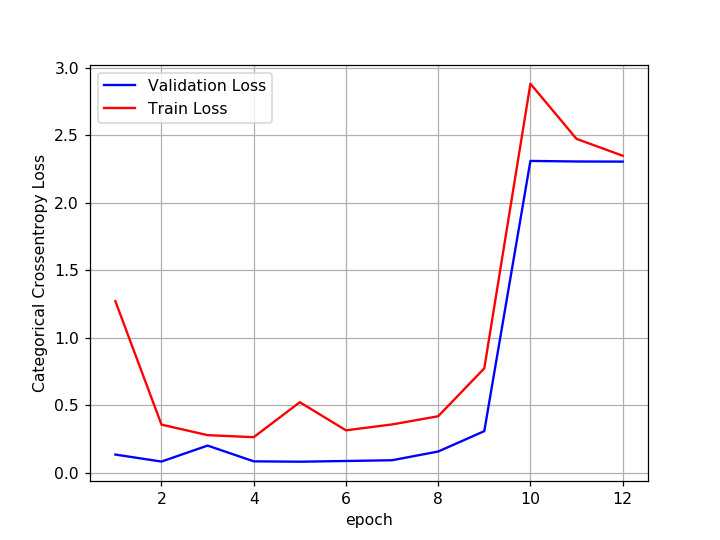

In [32]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# observation
- same case with elu activation function
- in initial epochs its quite good, but the situation get worst in later epochs

<h2><font color="blue">5 Hidden layer convnets with without BN, maxpooling in each layer, activation:- relu,otimizer:-Nadam</font></h2>

In [28]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape,padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(132, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(92, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(52, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))


model.add(Conv2D(42, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 260us/step - loss: 2.0267 - acc: 0.2208 - val_loss: 0.3644 - val_acc: 0.8541
Epoch 2/12
60000/60000 [==============================] - 14s 228us/step - loss: 0.3578 - acc: 0.8853 - val_loss: 0.0724 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 14s 230us/step - loss: 0.1837 - acc: 0.9581 - val_loss: 0.0439 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 14s 230us/step - loss: 0.1507 - acc: 0.9651 - val_loss: 0.0370 - val_acc: 0.9909
Epoch 5/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.1326 - acc: 0.9709 - val_loss: 0.0348 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.1220 - acc: 0.9734 - val_loss: 0.0394 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 15s 245us/step - loss: 0.1133 - acc: 0.9753 - val_loss: 0.

<IPython.core.display.Javascript object>


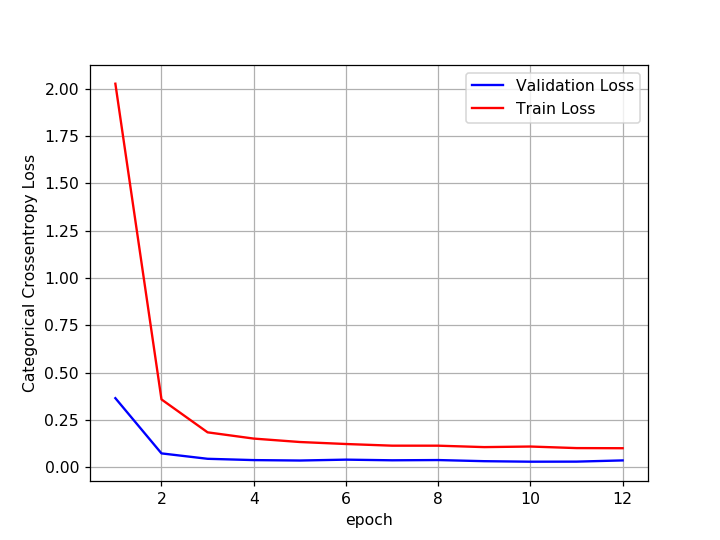

In [29]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [34]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Hidden_Layers","BatchNormalization","activation","optimizer", "Kernel Size","max_pool_kernel", "Train_acc","Test_acc"]
x.add_row([3,"No","relu","adam","(3x3)","(2x2)",0.9844,0.9920])
x.add_row([5,"No","relu","adam",'(5x5)',"(4x4)",0.9875,0.9944])
x.add_row([7,"No","relu","adam",'(7x7)',"(3x3)",0.7864,0.7963])
x.add_row([7,"No","relu","adam",'(3x3)',"(2x2)",0.9834,0.9920])
x.add_row([7,"No","relu","adam",'(3x3)',"(4x4)",0.9713,0.9913])

x.add_row([3,"yes","sigmoid","rmsprop",'(3x3)',"(2x2)",0.9636,0.9853])
x.add_row([4,"No","relu","adagrad",'(3x3)',"(2x2)",0.9611,0.9881])
x.add_row([5,"yes","relu","adadelta",'(5x5)',"(2x2)",0.9867,0.9956])
x.add_row([5,"No","selu","Nadam",'(5x5)',"(2x2)",0.0989,0.101])
x.add_row([5,"No","relu","Nadam",'(5x5)',"(2x2)",0.9777,0.9928])

print(x)

+---------------+--------------------+------------+-----------+-------------+-----------------+-----------+----------+
| Hidden_Layers | BatchNormalization | activation | optimizer | Kernel Size | max_pool_kernel | Train_acc | Test_acc |
+---------------+--------------------+------------+-----------+-------------+-----------------+-----------+----------+
|       3       |         No         |    relu    |    adam   |    (3x3)    |      (2x2)      |   0.9844  |  0.992   |
|       5       |         No         |    relu    |    adam   |    (5x5)    |      (4x4)      |   0.9875  |  0.9944  |
|       7       |         No         |    relu    |    adam   |    (7x7)    |      (3x3)      |   0.7864  |  0.7963  |
|       7       |         No         |    relu    |    adam   |    (3x3)    |      (2x2)      |   0.9834  |  0.992   |
|       7       |         No         |    relu    |    adam   |    (3x3)    |      (4x4)      |   0.9713  |  0.9913  |
|       3       |        yes         |  sigmoid 

# Observation
- Increasing kernel size decreases the accuracy
- if we increase hidden layers and keep the kernels low (2x2) or (3x3) we get good accuracy
- max pool kernel size hardly effect the accuracy
- I have added a failed case with selu activation